### Notebook by [Volkan Sonmez](http://www.pythonicfool.com/)  
### Audio Dataset (Laughters) Analysis
### Several recordings of laughters in .wav format are analyzed with Librosa and Matplotlib Libraries. 
### Convolutional NNs are used to detect if the laughters are sincere or fake.
####  https://github.com/volkansonmez/Exploratory_Data_Analysis_and_ML_Projects


## Table of contents

1. [Introduction](#Introduction)

2. [License](#License)

3. [EDA and Building ML Model](#EDA_and_Building_ML_Model)

4. [Conclusion](#Conclusion)

## Introduction

[[ go back to the top ]](#Table-of-contents)

A small notebook to detect if a laughter recording is sincere or fake. I am the culprit making these creepy sounds.
This is made for students to learn audio libraries and to play with convolutional neural networks, nothing more. 

The 'laugh' folder has 12 laughter audio files for training. 
The 'laugh_test' folder has 10 audio files for testing and validation 

Laughters were analyzed with Matplot and Librosa Libraries. A 3 layer convolutional neural network and trained for logistic regression to detect the sincerity of these samples.

The dataset can be obtained at: https://github.com/volkansonmez/Exploratory_Data_Analysis_and_ML_Projects/tree/master/Audio%20Dataset 

## EDA_and_Building_ML_Model

[[ go back to the top ]](#Table-of-contents)

Instructions: Load the samples into librosa library and view the spectograms. Listen to some samples with IPython.display.Audio tool. Since the dataset is so small, there had to be some sharp differences in sincere and fake samples. View these laughters' peaks and patterns with the matplot library tools. After doing some padding to bring all samples to the same length, take the melspectrograms and convert them to gray scale. Feed the gray scale melspectrograms into a convolutional neural network. The dimensions of CNN can further optimized depending on the complexity of the samples. For this dataset, you will find a few layers of CNN suffice. Do a logistic regression and train the model to detect if the laughters are sincere or fake. 

In [22]:
# Import necessary libraries

import librosa
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Audio
%matplotlib inline

In [2]:
# Check and view one of the audio files in the 'laugh' directory where all the training data is stored

x, sampling_rate = librosa.load('laugh/was_right.wav')
print(sampling_rate, len(x)/sampling_rate)
dt = 1 / sampling_rate
T = x.size / sampling_rate
t = np.r_[0:T:dt] #  this is np.linspace(0, T, len(x))  which is 0 second to 2.43 seconds, in 53597 sample points
display(Audio(x, rate=sampling_rate))
print(type(x), x.shape, len(x), t[:3], len(t))

22050 2.430702947845805


<class 'numpy.ndarray'> (53597,) 53597 [0.00000000e+00 4.53514739e-05 9.07029478e-05] 53597


Text(0, 0.5, 'frequency [Hz]')

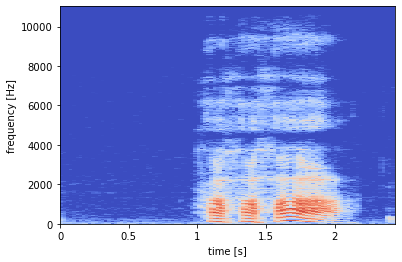

In [3]:
# View the short term fourier transform of the randomly selected audio file from the training data

plt.figsize = (20,5)
from librosa.display import specshow
X = librosa.stft(x)
X_dB = librosa.amplitude_to_db(np.abs(X))
specshow(X_dB, sr=sampling_rate, x_axis='time', y_axis='hz')
plt.xlabel('time [s]')
plt.ylabel('frequency [Hz]')

duration: 4.265351473922903 seconds


duration: 3.1133333333333333 seconds


duration: 2.729342403628118 seconds


duration: 2.1960090702947848 seconds


duration: 3.412018140589569 seconds


duration: 3.0920181405895693 seconds


duration: 2.068027210884354 seconds


duration: 2.0253514739229024 seconds


duration: 2.430702947845805 seconds


duration: 2.772018140589569 seconds


duration: 2.068027210884354 seconds


duration: 1.8760090702947845 seconds


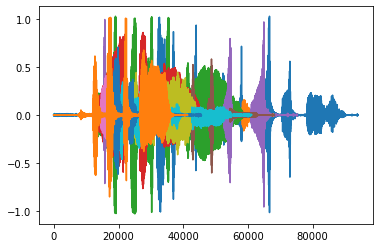

In [4]:
# Import all the training data and view (or hear) the audio files

directory = 'laugh'
name_list = ['crying_histerical.wav', 'donkey_hehehehe.wav', 'fainty_long.wav', 'fainty_short.wav', 
             'histerical_ha.wav','histerical_he.wav', 'skeptical.wav', 'sneaky.wav', 'was_right.wav', 
             'confirmation.wav', 'confirmation2.wav','winning.wav']

# There are 6 sincere and 6 fake laughters in the training dataset:

# sincere_list: 
# ['crying_histerical.wav', 'donkey_hehehehe.wav', 'fainty_long.wav', 'fainty_short.wav', 'histerical_ha.wav','histerical_he.wav']

# fake_list:
# ['skeptical.wav', 'sneaky.wav', 'was_right.wav', 'winning.wav', 'confirmation.wav', 'confirmation2.wav']

# display all the audio data
def display_audio_chart(directory, name_list):
    for i in range(len(name_list)):
        directory_path = directory + '/' + name_list[i]
        audio, sampling_rate = librosa.load(directory_path)
        duration = len(audio)/sampling_rate
        print('duration: {} seconds'.format(duration))
        display(Audio(audio, rate=sampling_rate))
        plt.plot(audio)
        
display_audio_chart('laugh', name_list)


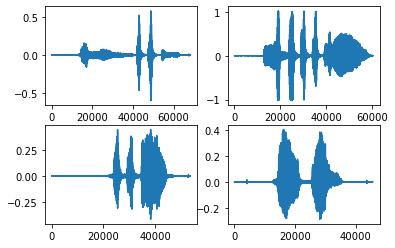

In [5]:
# Take a closer look to a few of the audio files in different lengths and amplitudes
# it looks like we need stft in good resolution to make some distinction to categorize them

fig = plt.figure()

ax = fig.add_subplot(2, 2, 1)
x, sampling_rate = librosa.load('laugh/histerical_he.wav')
ax.plot(x, clip_on = False)

ax = fig.add_subplot(2, 2, 2)
x, sampling_rate = librosa.load('laugh/fainty_long.wav')
ax.plot(x, clip_on = False)

ax = fig.add_subplot(2, 2, 3)
x, sampling_rate = librosa.load('laugh/was_right.wav')
ax.plot(x, clip_on = False)

ax = fig.add_subplot(2, 2, 4)
x, sampling_rate = librosa.load('laugh/skeptical.wav')
ax.plot(x, clip_on = False)


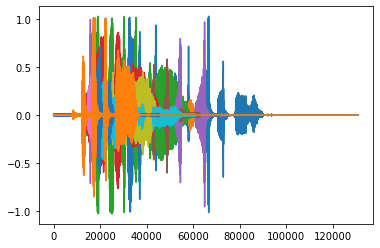

In [6]:
# Since the length of the videos are different, do some padding and extend all audio files to total 5.94 seconds
# this awkward audio length is picked so that displays would fit well into a 128 x 256 resolution mel spectogram

# store the new audio files in a dictionary
def do_padding(directory, sampling_rate, name_list, total_length):
    audio_dict = {}
    for i in range(len(name_list)):
        # access the file
        directory_path = directory + '/' + name_list[i]
        # load the file into an audio format 
        audio, sampling_rate = librosa.load(directory_path)
        # check the duration of the audio file
        duration = len(audio)
        # if duration is longer thatn total_length cut it to 5 seconds
        if duration > 131000:
            audio = audio[:131000]
            audio_dict[name_list[i]] = audio
            continue
        extra_pads_needed = np.zeros(131000 - duration) # 131000 sampling points is about 5.94 seconds (sr = 22050)
        audio = np.concatenate((audio, extra_pads_needed), axis = 0)
        # view each file
        # print('audio total: {} sample points'.format(len(audio)))
        # print('length: {}, seconds'.format(len(audio)/sampling_rate))
        # save each file to audio dictionary
        audio_dict[name_list[i]] = audio 
        # play the files
        # display(Audio(audio, rate=sampling_rate))
        # plot all audio files in one chart 
        plt.plot(audio)
    return audio_dict
train_dict = do_padding('laugh', sampling_rate, name_list, 5)

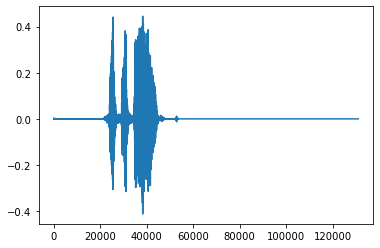

In [7]:
# All audio files are padded to apprx 5.95 seconds and stored in a dictionary with total 120000 sample points

# print(train_dict)
# check if it is stored properly
plt.plot(train_dict['was_right.wav'])
display(Audio(train_dict['was_right.wav'], rate=sampling_rate))
# print(train_dict['was_right.wav'].shape)

(131000,)


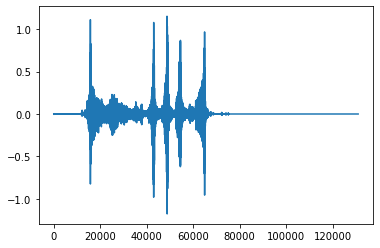

In [8]:
# Just for fun:
# mix up some data to see how the magnitude changes effect the result. A group of people laughing at the same time.

b = train_dict['donkey_hehehehe.wav']
c = train_dict['histerical_he.wav']
d = train_dict['histerical_ha.wav']
e = train_dict['fainty_long.wav']

f = b*0.5 + 2*c + d + 0.1*e
plt.plot(f)
display(Audio(f, rate=sampling_rate))
print(f.shape)

(128, 256) <class 'numpy.ndarray'>


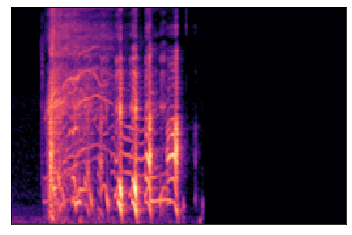

In [9]:
# Turn this audio file into mel spectogram

S = librosa.feature.melspectrogram(y=f, sr=sampling_rate, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB) 
print(S_dB.shape, type(S_dB))

In [10]:
# Turn all the audio files into Mel Spectrograms individually and then into images
# we perceive loudness on a logarithmic scale and transform amplitude into the decibel scale

# for each audio file do the transformation and store the images of the mel specs into a new dictionary
image_of_mel_specs = {}
for k in train_dict.keys():
    S = librosa.feature.melspectrogram(y=train_dict[k], sr=sampling_rate, n_mels=128, fmax=8000)
    S_dB = librosa.power_to_db(S, ref=np.max)
    image_of_mel_specs[k] = S_dB

In [11]:
# View the dictionary and some items in it if needed (the below two lines)

# librosa.display.specshow(image_of_mel_specs['fainty_long.wav'])
# librosa.display.specshow(image_of_mel_specs['donkey_hehehehe.wav'])

In [12]:
# For simplicity, working on gray scale would be efficient instead of multiple colors
# turn the mel specs into a gray 2d image by scaling it (0 is white, 255 is black)

def spec_to_gray_image(spec, eps=1e-6):
    mean = spec.mean()
    std = spec.std()
    spec_norm = (spec - mean) / (std + eps)
    spec_min, spec_max = spec_norm.min(), spec_norm.max()
    spec_scaled = 255 * (spec_norm - spec_min) / (spec_max - spec_min)
    spec_scaled = spec_scaled.astype(np.uint8)
    return spec_scaled


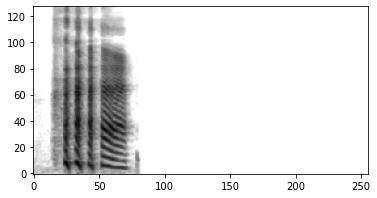

In [13]:
# Test the mixed laughter image made earlier

test = spec_to_gray_image(S_dB)
plt.imshow(test, cmap = plt.cm.binary, origin = 0)

In [14]:
# Convert all laughter audios into gray scale format.

gray_scaled_mels = {}
for k in image_of_mel_specs.keys():
    gray_scaled_mel_image = spec_to_gray_image(image_of_mel_specs[k], eps=1e-6)
    gray_scaled_mels[k] = gray_scaled_mel_image


12
(128, 256)
[ 80  62  36  29  42  59  53  47  61  54  43  52  44  45  41  54  56  35
  38  43  60  68  63  55  55  46  51  48  55  63  47  54  56  47  61  62
  49  58  75  83 105 117 109  82  69  76  76  79  88  99  88  73  79  82
  84  98  92  81  74  66  70  77  62  65  65  81  75  70  77  71  69  59
  63  69  59  57  59  67  70  56  54  57  44  56  57  62  68  48  16   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0 

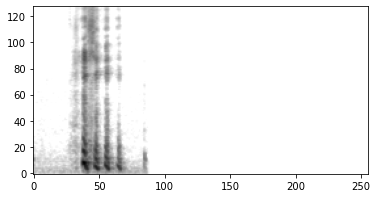

In [15]:
# Test the dictionary items, see the shape of the mel spec

plt.imshow(gray_scaled_mels['sneaky.wav'], cmap = plt.cm.binary, origin = 0)
print(len(gray_scaled_mels))
print(gray_scaled_mels['sneaky.wav'].shape)
print(gray_scaled_mels['sneaky.wav'][0]) # first line's values 

In [16]:
# Normalize the values of the training set

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

normalized_gray_scaled_mels = {}
for k, v in gray_scaled_mels.items():
    # normalize the values between 0 and 1
    normalized_item = min_max_scaler.fit_transform(gray_scaled_mels[k])
    # convert the data into 1 x 128 x 256 to train it with pytorch
    normalized_item = normalized_item[np.newaxis, :]
    # store the normalized and reshaped items into dictionary
    normalized_gray_scaled_mels[k] = normalized_item

# check if the shape and the look of data stored looks right
print(normalized_gray_scaled_mels['histerical_he.wav'].shape)
normalized_gray_scaled_mels['histerical_he.wav'][0][0][100:150]

(1, 128, 256)


array([0.48734177, 0.48550725, 0.40650407, 0.38095238, 0.52688172,
       0.43262411, 0.40932642, 0.37198068, 0.33009709, 0.33830846,
       0.31282051, 0.29100529, 0.29533679, 0.30456853, 0.36683417,
       0.43654822, 0.41326531, 0.35714286, 0.32989691, 0.29591837,
       0.33668342, 0.34848485, 0.36315789, 0.28823529, 0.34558824,
       0.49180328, 0.50515464, 0.59139785, 0.79347826, 0.68965517,
       0.63218391, 0.47692308, 0.47945205, 0.59541985, 0.73529412,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

1 double_high_pitch.wav (1, 1, 128, 256)
1 surprise.wav (1, 1, 128, 256)
1 fake4.wav (1, 1, 128, 256)
1 fake5.wav (1, 1, 128, 256)


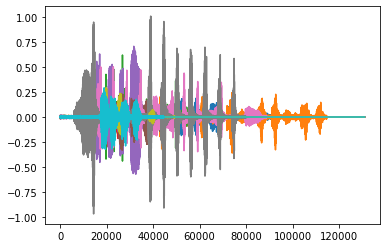

In [17]:
# Prepare the validation and test sets for neural networks using only one function to automate everything done above

# Note: 'laugh_test' folder has total 10 audio files holding test and validation audio files
# create a training validation set with 3 sincere 3 fake files 
# create a test set with 2 sincere and 2 fake files

validation_and_test_data = ['last_breath.wav', 'short_breath.wav', 'snake.wav', 'double_high_pitch.wav', 
                            'surprise.wav', 'fake1.wav', 'fake2.wav', 'fake3.wav', 'fake4.wav', 'fake5.wav']

sincere_list = ['last_breath.wav', 'short_breath.wav', 'snake.wav', 'double_high_pitch.wav', 'surprise.wav']

fake_list = ['fake1.wav', 'fake2.wav', 'fake3.wav', 'fake4.wav', 'fake5.wav']

validation_list = ['last_breath.wav', 'short_breath.wav', 'snake.wav', 'fake1.wav', 'fake2.wav', 'fake3.wav']

test_list = ['double_high_pitch.wav', 'surprise.wav','fake4.wav', 'fake5.wav']


# upload the files, do the padding, store the audio files in a dictionary
validation_audio = do_padding('laugh_test', sampling_rate, validation_list, 5)
test_audio = do_padding('laugh_test', sampling_rate, test_list, 5)
# print(len(validation_audio), len(test_audio))


# extract the mel spec, normalize, and test the audio files with the trained network 
def prepare_data(dictionary_to_unpack, sampling_rate = 22050):
    dataset = {}
    # for each item in the dictionary
    for k,v in dictionary_to_unpack.items():
        # take the mel_specs
        mel_spectogram = librosa.feature.melspectrogram(y=dictionary_to_unpack[k], sr=sampling_rate, 
                                                        n_mels=128, fmax=8000)
        # convert into decibel scales
        S_dB = librosa.power_to_db(mel_spectogram, ref=np.max)
        # convert into gray image
        gray_scaled_mel_image = spec_to_gray_image(S_dB, eps=1e-6)
        # normalize the values between 0-1
        normalized_item = min_max_scaler.fit_transform(gray_scaled_mel_image)
        # reshape the normalized data into 128 x 256 shape into one dimension
        flattened_item = normalized_item.reshape(1,1,128,256)
        # store it to dataset dictionary
        dataset[k] = flattened_item
    return dataset


# training_set
training_set = prepare_data(train_dict)

# validation set
validation_set = prepare_data(validation_audio)

# test set
test_set = prepare_data(test_audio)


# check the data
# for k, v in validation_set.items():
#     print(len(validation_set[k]), k, validation_set[k].shape)
# for k, v in training_set.items():    
#     print(len(training_set[k]), k,  training_set[k].shape)
for k, v in test_set.items():    
    print(len(test_set[k]), k, test_set[k].shape)


In [18]:
# Train a convolutional neural network with the training data and observe its performance with the validation set

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
device = 'cpu'


# all audio files in the training set:
name_list = ['crying_histerical.wav', 'donkey_hehehehe.wav', 'fainty_long.wav', 'fainty_short.wav', 
             'histerical_ha.wav','histerical_he.wav', 'skeptical.wav', 'sneaky.wav', 'was_right.wav', 
             'confirmation.wav', 'confirmation2.wav','winning.wav']

# the name of the files that has sincere laughters:
sincere_list = ['crying_histerical.wav', 'donkey_hehehehe.wav', 'fainty_long.wav', 'fainty_short.wav', 
             'histerical_ha.wav','histerical_he.wav']

# the name of the files that has fake laughters:
fake_list = ['skeptical.wav', 'sneaky.wav', 'was_right.wav', 'winning.wav', 
             'confirmation.wav', 'confirmation2.wav']

# the name of the files in validation list:
validation_list = ['last_breath.wav', 'short_breath.wav', 'snake.wav', 'fake1.wav', 'fake2.wav', 'fake3.wav']

# the name of the files in test list:
test_list = ['double_high_pitch.wav', 'surprise.wav','fake4.wav', 'fake5.wav']


# import the data to torch and reshape it.
def convert_np_into_tensor(dictionary):
    output_dict = {}
    for k, v in dictionary.items():
        normalized_image = dictionary[k]
        normalized_image = torch.tensor(normalized_image, dtype = float)
        # each image is (1, 128, 256)
        output_dict[k] = normalized_image
    return output_dict

training_tensor_dict = convert_np_into_tensor(training_set)
validation_tensor_dict = convert_np_into_tensor(validation_set)
test_tensor_dict = convert_np_into_tensor(test_set)

# check the data
for k, v in training_tensor_dict.items():    
    print(len(training_tensor_dict[k]), k, type(training_tensor_dict[k]), training_tensor_dict[k].shape)

list(training_tensor_dict)

1 crying_histerical.wav <class 'torch.Tensor'> torch.Size([1, 1, 128, 256])
1 donkey_hehehehe.wav <class 'torch.Tensor'> torch.Size([1, 1, 128, 256])
1 fainty_long.wav <class 'torch.Tensor'> torch.Size([1, 1, 128, 256])
1 fainty_short.wav <class 'torch.Tensor'> torch.Size([1, 1, 128, 256])
1 histerical_ha.wav <class 'torch.Tensor'> torch.Size([1, 1, 128, 256])
1 histerical_he.wav <class 'torch.Tensor'> torch.Size([1, 1, 128, 256])
1 skeptical.wav <class 'torch.Tensor'> torch.Size([1, 1, 128, 256])
1 sneaky.wav <class 'torch.Tensor'> torch.Size([1, 1, 128, 256])
1 was_right.wav <class 'torch.Tensor'> torch.Size([1, 1, 128, 256])
1 confirmation.wav <class 'torch.Tensor'> torch.Size([1, 1, 128, 256])
1 confirmation2.wav <class 'torch.Tensor'> torch.Size([1, 1, 128, 256])
1 winning.wav <class 'torch.Tensor'> torch.Size([1, 1, 128, 256])


['crying_histerical.wav',
 'donkey_hehehehe.wav',
 'fainty_long.wav',
 'fainty_short.wav',
 'histerical_ha.wav',
 'histerical_he.wav',
 'skeptical.wav',
 'sneaky.wav',
 'was_right.wav',
 'confirmation.wav',
 'confirmation2.wav',
 'winning.wav']

In [19]:
# Note: The below model was intentionally overfit
# use GPU if needed by sending the data and target to device and change device name to 'gpu'
# data, target = data.to(device), target.to(device) 


# build the model
class Net(torch.nn.Module):
    def __init__(self):
        torch.nn.Module.__init__(self)
        self.conv1 = torch.nn.Conv2d(1, 2, kernel_size = 5) # in , out, kernel size
        self.conv2 = torch.nn.Conv2d(2, 4, kernel_size = 5) # in , out, kerner size
        self.conv3 = torch.nn.Conv2d(4, 8, kernel_size = 4) # in , out, kerner size
        self.fcl1 = torch.nn.Linear(8*13*29, 1) # in, out
        
        
    def forward(self, x):
        x = self.conv1(x)  # input 1 x 128 x 256 ---> (1,2) 5x5 conv1 ----> output 2 x 124 x 252 
        x = torch.nn.functional.dropout(x) # 2 x 124 x 252 
        x = torch.nn.functional.max_pool2d(x, 2) # maxpool1(2,2) ----> 2 x 62 x 126 
        x = torch.relu(x) # 2 x 62 x 126 
        x = self.conv2(x) # input 2 x 62 x 126 ----> (2,4) 5x5 conv2 ----> output 4 x 58 x 122
        x = torch.nn.functional.dropout(x) # 4 x 58 x 122 
        x = torch.nn.functional.max_pool2d(x, 2) # maxpool2(2,2) ----> 4 x 29 x 61
        x = torch.relu(x) # 4 x 29 x 61
        x = self.conv3(x)  # input 4 x 29 x 61 ---> (4,8) 4x4 conv1 ----> output 8 x 26 x 58 
        x = torch.nn.functional.dropout(x) # 8 x 26 x 58 
        x = torch.nn.functional.max_pool2d(x, 2) # maxpool1(2,2) ----> 8 x 13 x 29 
        x = torch.relu(x) # 8 x 13 x 29 
        x = x.view(-1, 8*13*29) # input 8 x 13 x 29 ----> output (1 x 8 x 13 x 29 ) flatten to one dimension
        x = self.fcl1(x) # input: (8*13*29), output: 1 dimension, a scalar number
        x = torch.sigmoid(x) # output the logit with the sigmoid function
        return x

    
# instantiate the object
model = Net().to(device)
optimizer = torch.optim.Adam(model.parameters())
criterion = torch.nn.BCELoss()

# train all the instances for each epoch
for i in range(5000):
    # zero grad the optimizer
    optimizer.zero_grad()
    # to avoid RuntimeError: Expected object of scalar type Double but got scalar type Float, change the type
    model = model.double()
    # pick a random item in the dictionary
    random_key = np.random.choice(list(training_tensor_dict))
    # forward prop
    output = model(training_tensor_dict[random_key])
    # check the loss
    if random_key in fake_list:
        y = torch.tensor(0).double()
    elif random_key in sincere_list: # if k in sincere list y_pred is equal to 1
        y = torch.tensor(1).double()
    else:
        print('item not found')
        break
    loss = criterion(output, y)# binary cross entropy loss
    # ouput the loss and validate the loss with the validation set
    if i %499 == 0:
        print('training loss', loss.item(), 'at iteration:', i)
        # validation loss
        random_key = np.random.choice(list(validation_tensor_dict))
        if random_key.startswith('f'):
            y = torch.tensor(0).double()
        else:
            y = torch.tensor(1).double()
        result = model(validation_tensor_dict[random_key])
        validation_data_loss = criterion(result , y)
        print('validation loss:', validation_data_loss.item())
    # backprop
    loss.backward()
    # update the parameters
    optimizer.step()
        
print('Finished Training')


training loss 0.6741590379255058 at iteration: 0
validation loss: 0.7050096680704632


/Users/volkansonmez/miniconda/lib/python3.7/site-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


training loss 4.7525397806055215e-06 at iteration: 499
validation loss: 0.00020480289462764288
training loss 0.00010617207989423795 at iteration: 998
validation loss: 1.6722902506600905e-07
training loss 5.197467577826561e-06 at iteration: 1497
validation loss: 6.918151080720217e-06
training loss 4.5963233219482535e-14 at iteration: 1996
validation loss: 7.463212659523984e-07
training loss 1.3493883958972515e-05 at iteration: 2495
validation loss: 7.736275615013331e-07
training loss 1.1201307440958998e-05 at iteration: 2994
validation loss: 0.003104211172778005
training loss 9.547918011776392e-15 at iteration: 3493
validation loss: 2.2568711369673685e-09
training loss 2.2918407867381593e-06 at iteration: 3992
validation loss: 0.0692061957817885
training loss 5.96723048275453e-06 at iteration: 4491
validation loss: 0.00048817136272390373
training loss 9.546646810970074e-10 at iteration: 4990
validation loss: 6.913903501729571e-07
Finished Training


In [20]:
# The name of the files in test and validation lists are:
test_list = ['double_high_pitch.wav', 'surprise.wav','fake4.wav', 'fake5.wav']
validation_list = ['last_breath.wav', 'short_breath.wav', 'snake.wav', 'fake1.wav', 'fake2.wav', 'fake3.wav']

In [21]:
# Test the model here both with validation set and test set: 

# test set 
for i in test_list:
    test_image = test_tensor_dict[i]
    test_output = model(test_image)
    output = test_output.detach().numpy()
    if output < 0.5:
        output = 0
        status = 'Fake'
    else:
        output = 1
        status = 'Sincere'
    print('The below audio gets a score:', output, 'and it is:',status)
    print('The name of the file:',i)
    x, sampling_rate = librosa.load('laugh_test/' + i)
    display(Audio(x, rate=sampling_rate))
    
    

# validation set revisited
for i in validation_list:
    test_image = validation_tensor_dict[i]
    test_output = model(test_image)
    output = test_output.detach().numpy()
    if output < 0.5:
        output = 0
        status = 'Fake'
    else:
        output = 1
        status = 'Sincere'
    print('The below audio gets a score:', output, 'and it is:',status)
    print('The name of the file:',i)
    x, sampling_rate = librosa.load('laugh_test/' + i)
    display(Audio(x, rate=sampling_rate))

The below audio gets a score: 1 and it is: Sincere
The name of the file: double_high_pitch.wav


The below audio gets a score: 1 and it is: Sincere
The name of the file: surprise.wav


The below audio gets a score: 0 and it is: Fake
The name of the file: fake4.wav


The below audio gets a score: 0 and it is: Fake
The name of the file: fake5.wav


The below audio gets a score: 1 and it is: Sincere
The name of the file: last_breath.wav


The below audio gets a score: 1 and it is: Sincere
The name of the file: short_breath.wav


The below audio gets a score: 1 and it is: Sincere
The name of the file: snake.wav


The below audio gets a score: 0 and it is: Fake
The name of the file: fake1.wav


The below audio gets a score: 0 and it is: Fake
The name of the file: fake2.wav


The below audio gets a score: 0 and it is: Fake
The name of the file: fake3.wav


## Conclusion

[[ go back to the top ]](#Table-of-contents)

100 percent accuracy achieved on detecting the sincerity of the laughters of the smallest, and the most awkward audio dataset.